In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/datasets/archive (2).zip" -d "/content/chest_xray"

In [4]:
!find /content/chest_xray -maxdepth 3 -type d

/content/chest_xray
/content/chest_xray/chest_xray
/content/chest_xray/chest_xray/train
/content/chest_xray/chest_xray/train/NORMAL
/content/chest_xray/chest_xray/train/PNEUMONIA
/content/chest_xray/chest_xray/chest_xray
/content/chest_xray/chest_xray/chest_xray/train
/content/chest_xray/chest_xray/chest_xray/val
/content/chest_xray/chest_xray/chest_xray/test
/content/chest_xray/chest_xray/val
/content/chest_xray/chest_xray/val/NORMAL
/content/chest_xray/chest_xray/val/PNEUMONIA
/content/chest_xray/chest_xray/test
/content/chest_xray/chest_xray/test/NORMAL
/content/chest_xray/chest_xray/test/PNEUMONIA
/content/chest_xray/chest_xray/__MACOSX
/content/chest_xray/chest_xray/__MACOSX/chest_xray


In [5]:
train_dir = "/content/chest_xray/chest_xray/train"
val_dir = "/content/chest_xray/chest_xray/val"

In [6]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/chest_xray/train",
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/chest_xray/chest_xray/val",
    image_size=(224, 224),
    batch_size=32
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [7]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [8]:
# Load Dataset Chest X-ray
train_dir = "/content/chest_xray/chest_xray/train"
val_dir = "/content/chest_xray/chest_xray/val"

img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale'
)

print("Classes:", train_ds.class_names)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Classes: ['NORMAL', 'PNEUMONIA']


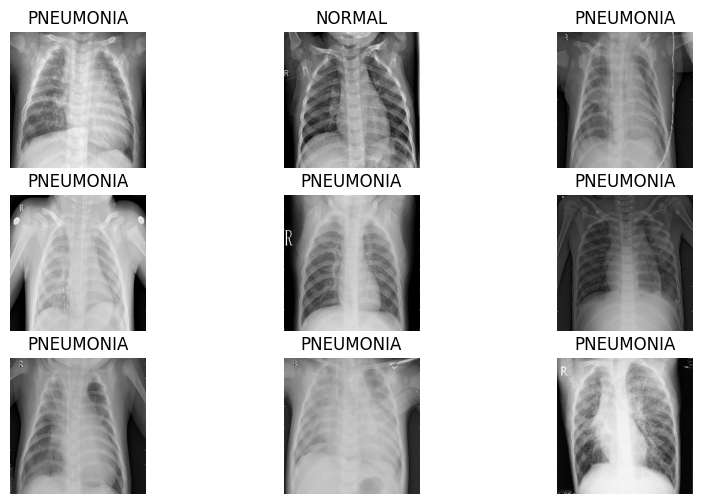

In [9]:
# Figures to check for images
plt.figure(figsize=(10, 6))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    break

In [10]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))
val_ds = val_ds.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), y))
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
# CNN Model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilation of the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train Model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 646s 4s/step - accuracy: 0.7280 - loss: 33.6439 - val_accuracy: 0.8125 - val_loss: 0.4500
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 699s 4s/step - accuracy: 0.8312 - loss: 0.3866 - val_accuracy: 0.8125 - val_loss: 0.8113
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 683s 4s/step - accuracy: 0.8419 - loss: 0.3584 - val_accuracy: 0.8125 - val_loss: 0.4779
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 663s 4s/step - accuracy: 0.8722 - loss: 0.3087 - val_accuracy: 0.7500 - val_loss: 0.8242
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - accuracy: 0.8972 - loss: 0.2520 - val_accuracy: 0.7500 - val_loss: 2.2530
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 680s 4s/step - accuracy: 0.8965 - loss: 0.2527 - val_accuracy: 0.8750 - val_loss: 0.2548
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.9237 - loss: 0.2092 - val_accuracy: 0.8750 - val_loss: 0.4318
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.9273 - loss: 0.1989 - val_acc

In [16]:
# Model Evaluation
loss, acc = model.evaluate(val_ds, verbose=2)
print(f"\nValidation Accuracy: {acc:.4f}")

1/1 - 1s - 840ms/step - accuracy: 0.8750 - loss: 0.2803

Validation Accuracy: 0.8750


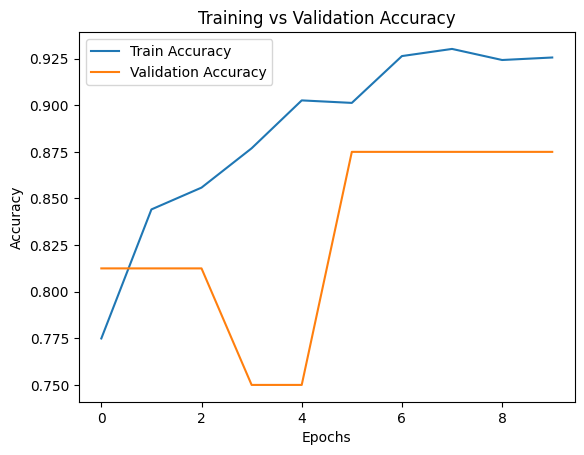

In [17]:
# Measure Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()